### Etapa 1: Importação das Bibliotecas

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch import nn, optim
import torch.nn.functional as F 
from sklearn.metrics import confusion_matrix


In [2]:
np.random.seed(123)
torch.manual_seed(123)

In [3]:
base = pd.read_csv("./Arquivos/iris.csv")
base

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


c:\Users\vitao\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


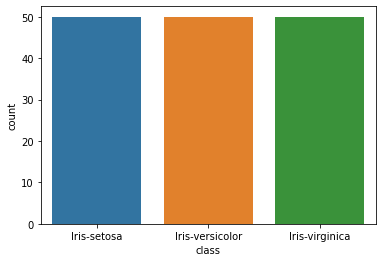

In [5]:
sns.countplot(base['class']);

In [6]:
previsores = base.iloc[:,0:4].values
classe = base.iloc[:, 4].values

In [7]:
previsores.shape

(150, 4)

In [8]:
classe.shape

(150,)

In [9]:
np.unique(base['class'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
encoder = LabelEncoder()
classe = encoder.fit_transform(classe)

In [11]:
np.unique(classe)

array([0, 1, 2])

In [16]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25)

In [17]:
previsores_treinamento = torch.tensor(previsores_treinamento, dtype=torch.float)

In [18]:
type(previsores_treinamento)

torch.Tensor

In [19]:
classe_treinamento = torch.tensor(classe_treinamento, dtype=torch.long)

In [20]:
type(classe_treinamento)

torch.Tensor

In [22]:
# 4 -> 4 -> 4 -> 3
# Não tem a última função de ativação em multiclasse porque se usa softmax e faz junto do treinamento
classificador = nn.Sequential(
    nn.Linear(4,4),
    nn.ReLU(),
    nn.Linear(4,4),
    nn.ReLU(),
    nn.Linear(4,3)
)

In [23]:
criterion = nn.CrossEntropyLoss() # Para multiclasse
optimizer = optim.Adam(classificador.parameters(), lr=0.001, weight_decay = 0.0001)

In [25]:
dataset = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

In [27]:
for epoch in range(2000):
    running_loss = 0.
    running_accuracy = 0

    for data in train_loader:
        inputs, labels = data

        optimizer.zero_grad()

        outputs = classificador.forward(inputs)
        loss = criterion(outputs, labels)
        loss.backward()

        # Softmax
        outputs = F.softmax(outputs) # Aplica softmax nos outputs
        top_p, top_class = outputs.topk(k = 1, dim = 1) # Maiores valores indice e classe (a maior probabilidade = k 1) e dim 1 -> uma coluna que é a classe

        equals = top_class == labels.view(*top_class.shape) # Se a classe com a maior probabilidade for igual a classe real, é verdadeiro

        running_accuracy += torch.mean(equals.type(torch.float)) # Somando os valores pra fazer o accuracy

        optimizer.step() # Atualiza os pesos

        running_loss += loss.item() # perda
    
    print(f'Época {epoch + 1}: perda {running_loss/len(train_loader)} - accuracy {running_accuracy/len(train_loader)}')



C:\Users\vitao\AppData\Local\Temp\ipykernel_6460\3724677925.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  outputs = F.softmax(outputs)


Época 1: perda 1.1123906870683034 - accuracy 0.2916666567325592
Época 2: perda 1.1050852636496227 - accuracy 0.2916666567325592
Época 3: perda 1.1043038666248322 - accuracy 0.2916666865348816
Época 4: perda 1.1087503631909688 - accuracy 0.32500001788139343
Época 5: perda 1.1094360848267872 - accuracy 0.2916666567325592
Época 6: perda 1.1026458243529003 - accuracy 0.2916666567325592
Época 7: perda 1.1144058207670848 - accuracy 0.2916666567325592
Época 8: perda 1.1134179433186848 - accuracy 0.2916666567325592
Época 9: perda 1.1067701776822407 - accuracy 0.2916666567325592
Época 10: perda 1.1061900854110718 - accuracy 0.2916666865348816
Época 11: perda 1.100291798512141 - accuracy 0.32499998807907104
Época 12: perda 1.1052633325258892 - accuracy 0.2916666567325592
Época 13: perda 1.0999202728271484 - accuracy 0.34166669845581055
Época 14: perda 1.1045446495215099 - accuracy 0.3499999940395355
Época 15: perda 1.1089879373709361 - accuracy 0.31666669249534607
Época 16: perda 1.1041048566500

### Avaliação

In [28]:
previsores_teste = torch.tensor(previsores_teste, dtype=torch.float)

In [29]:
previsoes = classificador(previsores_teste)

In [30]:
previsoes

tensor([[ -4.0480,   6.7304,  -4.7731],
        [ -4.6061,  -6.3603,   8.4831],
        [  7.8815,  -2.1066,  -9.5241],
        [  8.2674,  -2.5930,  -9.3074],
        [  5.4049,  -0.7993,  -7.5639],
        [  8.1220,  -2.5153,  -9.1941],
        [ -5.2765,  -8.5933,  10.8223],
        [ -3.8421,   6.4109,  -4.5469],
        [ -4.3363,  -2.5987,   4.6590],
        [  7.9668,  -2.3661,  -9.1956],
        [ -3.8763,   4.4452,  -2.4956],
        [  6.5105,  -1.1817,  -8.8106],
        [ -4.9026,  -7.3479,   9.5176],
        [  7.4680,  -1.9999,  -8.9908],
        [  7.9575,  -2.4015,  -9.1137],
        [ -4.2246,   0.9719,   1.0488],
        [ -3.7321,   6.1168,  -4.1982],
        [ -3.9559,   6.5515,  -4.6055],
        [ -4.2160,  -1.1849,   3.2192],
        [ -3.9499,   6.5397,  -4.5945],
        [ -4.9473,  -7.4968,   9.6735],
        [ -3.8259,   2.7082,  -0.7535],
        [ -4.1862,  -0.3103,   2.3346],
        [ -4.6637,  -6.5520,   8.6838],
        [ -3.9920,   6.6215,  -4.6711],


In [35]:
F.softmax(previsoes, dim=1)

tensor([[2.0844e-05, 9.9997e-01, 1.0094e-05],
        [2.0675e-06, 3.5776e-07, 1.0000e+00],
        [9.9995e-01, 4.5942e-05, 2.7593e-08],
        [9.9998e-01, 1.9203e-05, 2.3300e-08],
        [9.9798e-01, 2.0169e-03, 2.3273e-06],
        [9.9998e-01, 2.4001e-05, 3.0178e-08],
        [1.0196e-07, 3.6977e-09, 1.0000e+00],
        [3.5250e-05, 9.9995e-01, 1.7421e-05],
        [1.2389e-04, 7.0414e-04, 9.9917e-01],
        [9.9997e-01, 3.2542e-05, 3.5192e-08],
        [2.4295e-04, 9.9879e-01, 9.6637e-04],
        [9.9954e-01, 4.5614e-04, 2.2178e-07],
        [5.4623e-07, 4.7357e-08, 1.0000e+00],
        [9.9992e-01, 7.7282e-05, 7.1122e-08],
        [9.9997e-01, 3.1707e-05, 3.8556e-08],
        [2.6546e-03, 4.7952e-01, 5.1783e-01],
        [5.2802e-05, 9.9991e-01, 3.3129e-05],
        [2.7331e-05, 9.9996e-01, 1.4274e-05],
        [5.8262e-04, 1.2073e-02, 9.8734e-01],
        [2.7823e-05, 9.9996e-01, 1.4603e-05],
        [4.4695e-07, 3.4916e-08, 1.0000e+00],
        [1.4068e-03, 9.6821e-01, 3

In [36]:
previsoes = [np.argmax(t) for t in previsoes.detach().numpy()]
previsoes

[1,
 2,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 0,
 1,
 0,
 2,
 0,
 0,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 0,
 2,
 2,
 2,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 2]

<AxesSubplot:>

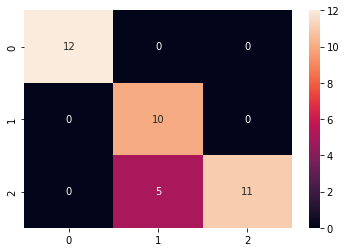

In [39]:
matriz = confusion_matrix(previsoes, classe_teste)
sns.heatmap(matriz, annot=True)

### Validação Cruzada